# Stl Files

Personal notes on ultrasound hyperthermia (USHT) project done collaboration with UZH/ZHAW

Manuel Vielma

In [1]:

from datetime import datetime as _deepnote_datetime
last_update = _deepnote_datetime.strptime('2023-02-22T00:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%fZ")


# To do

### Simulations of in vitro setups 

- [ ] Tank without Petri at 1.1MHz + temperature calculation

### Simulations of in vivo setups

### Experiments

- [ ] Setup 0.25MHz

# Brief notes

### Lower frequencies should be considered

- Higher frequencies of ultrasound have shorter wavelengths and are attenuated/scattered more easily

- Low frequency more apt for longer depths

- Harder do do simulations at high frequencies

- Electronics easier at lower frequencies

# Setups

<iframe src="https://myhub.autodesk360.com/ue28f05b0/shares/public/SH35dfcQT936092f0e43d22d0c92e8e7663e?mode=embed" width="1024" height="768" allowfullscreen="true" webkitallowfullscreen="true" mozallowfullscreen="true"  frameborder="0"></iframe>

<iframe src="https://myhub.autodesk360.com/ue28f05b0/shares/public/SH35dfcQT936092f0e438d0661f1440a3137?mode=embed" width="1024" height="768" allowfullscreen="true" webkitallowfullscreen="true" mozallowfullscreen="true"  frameborder="0"></iframe>

In [2]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np
import plotly.graph_objects as go

In [3]:
Volumes = ['Petri','Tank']

In [4]:
Volume = 'Petri'

In [5]:
def get_stl_color(x):
    #two "attribute byte count" bytes at the end of every triangle to store a 15-bit RGB color
    #bits 0 to 4 are the intensity level for blue (0 to 31)
    #bits 5 to 9 are the intensity level for green (0 to 31)
    #bits 10 to 14 are the intensity level for red (0 to 31)
    sb = f'{x:015b}'[::-1]
    r = str(int(255/31*int(sb[:5],base=2)))
    g = str(int(255/31*int(sb[5:10],base=2)))
    b = str(int(255/31*int(sb[10:15],base=2)))
    color = f'rgb({r},{g},{b})'
    return color

def stl2mesh3d(stl_file):
    stl_mesh = mesh.Mesh.from_file(stl_file)
    # stl_mesh is read by nympy-stl from a stl file; it is  an array of faces/triangles (i.e. three 3d points) 
    # this function extracts the unique vertices and the lists I, J, K to define a Plotly mesh3d
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    # the array stl_mesh.vectors.reshape(p*q, r) can contain multiple copies of the same vertex;
    # extract unique vertices from all mesh triangles
    vertices, ixr = np.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = np.take(ixr, [3*k for k in range(p)])
    J = np.take(ixr, [3*k+1 for k in range(p)])
    K = np.take(ixr, [3*k+2 for k in range(p)])
    facecolor = np.vectorize(get_stl_color)(stl_mesh.attr.flatten())
    x,y,z = vertices.T
    trace = go.Mesh3d(x=x, y=y, z=z, i=I, j=J, k=K, facecolor=facecolor)
    # optional parameters to make it look nicer
    trace.update(flatshading=True, lighting_facenormalsepsilon=0, lighting_ambient=0.7)
    return trace
#get_stl_color('/work/3Dmodels/3_Petri_tank.stl')
#stl2mesh3d('/work/3Dmodels/Mouse_fullBody.stl')


In [6]:
layout = go.Layout(
    autosize=True,
    #width=1000,
    #height=1000,

    xaxis= go.layout.XAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    yaxis= go.layout.YAxis(linecolor = 'black',
                          linewidth = 1,
                          mirror = True),

    margin=go.layout.Margin(
        l=10,
        r=10,
        b=20,
        t=20,
        pad = 4
    )
)

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive 

model = widgets.Dropdown(options=[('inner top v1', '10601_4_AbsorberTop.stl'), ('inner top v2','10701_4_AbsorberTop.stl'), ('inner side','10601_3_cuerpo9.stl')], description='Setup');

def plotModel(model):
    path = '3Dmodels/'+ model
    fig = go.Figure(data=[
    stl2mesh3d(path)], layout = layout)
    fig.show()



In [8]:
interactive(plotModel, model=model) 

interactive(children=(Dropdown(description='Setup', options=(('inner top v1', '10601_4_AbsorberTop.stl'), ('in…

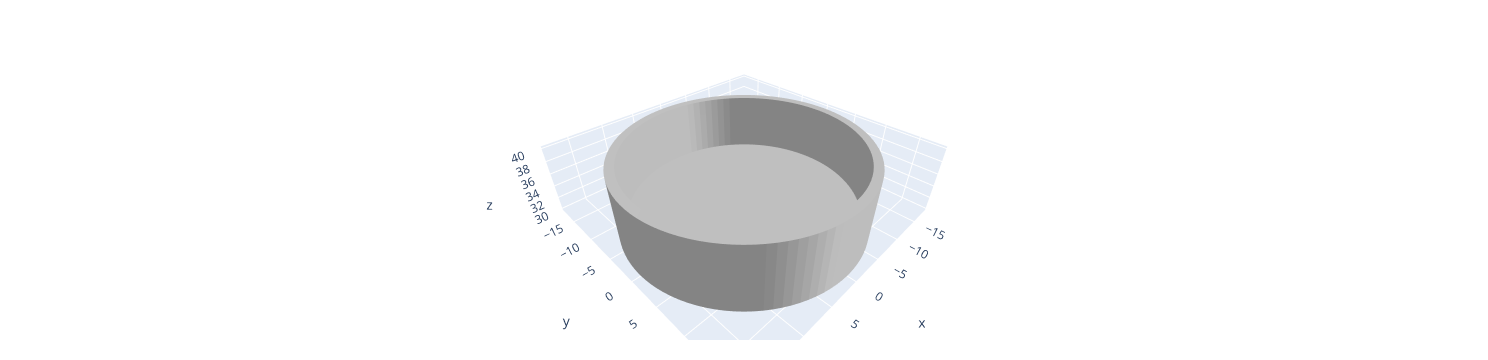

In [9]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    stl2mesh3d('3Dmodels/3_Petri_tank.stl')], layout = layout)
fig.show()